In [1]:
# Import the modules
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



---

## Split the Data into Training and Testing Sets

### Step 1: Read the `loan_approval_dataset.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(
    Path('Resources/loan_approval_dataset.csv')
)

# Review the DataFrame
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Define the new column names without spaces
new_columns = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
               'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
               'residential_assets_value', 'commercial_assets_value',
               'luxury_assets_value', 'bank_asset_value', 'loan_status']

# Rename the columns
df.columns = new_columns




In [4]:
df['education']=np.where(df['education'] == ' Graduate', 1, 0)
df['loan_status']=np.where(df['loan_status'] == ' Approved', 1, 0)
df['self_employed']=np.where(df['self_employed'] == ' Yes', 1, 0)


df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [5]:
#df_approval = df.loc[df['loan_status']==1]

df_corr=df.corr()
df_corr['loan_status']

loan_id                     0.017685
no_of_dependents           -0.018114
education                   0.004918
self_employed               0.000345
income_annum               -0.015189
loan_amount                 0.016150
loan_term                  -0.113036
cibil_score                 0.770518
residential_assets_value   -0.014367
commercial_assets_value     0.008246
luxury_assets_value        -0.015465
bank_asset_value           -0.006778
loan_status                 1.000000
Name: loan_status, dtype: float64

<Axes: >

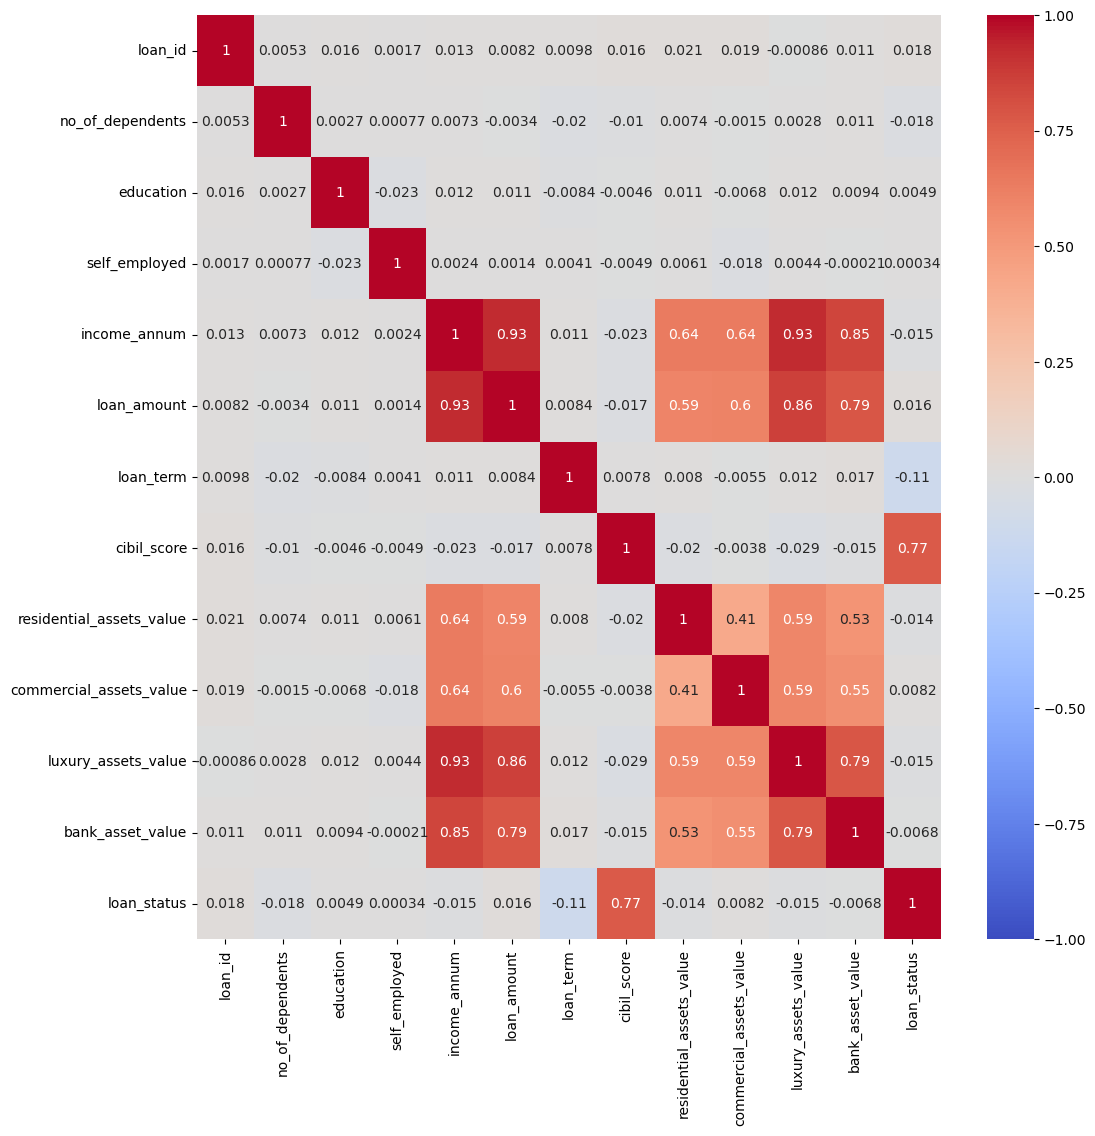

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, vmin=-1, cmap='coolwarm', annot=True)

In [7]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['loan_status']
# Separate the X variable, the features
X = df.drop(columns='loan_status')


In [8]:
# Review the y variable Series
y


0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int32

In [9]:
y.value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [10]:
# Review the X variable DataFrame
X

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [11]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Machine Learning Model

###  Logistic Regression.

In [12]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [13]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [14]:
# Generate a confusion matrix for the model
confusion_matrix(y_test,predictions)

array([[  2, 406],
       [  4, 656]], dtype=int64)

In [33]:
# Print the classification report for the model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.33      0.00      0.01       408
           1       0.62      0.99      0.76       660

    accuracy                           0.62      1068
   macro avg       0.48      0.50      0.39      1068
weighted avg       0.51      0.62      0.47      1068



### Gradient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
clf_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0)
clf_boosting.fit(X_train, y_train)
predictions_2 = clf_boosting.predict(X_test)


In [16]:
confusion_matrix(y_test,predictions_2)

array([[396,  12],
       [ 10, 650]], dtype=int64)

In [17]:
print(classification_report(y_test,predictions_2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       408
           1       0.98      0.98      0.98       660

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



### Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
predictions_3 = clf_dt.predict(X_test)


In [19]:
confusion_matrix(y_test,predictions_3)

array([[396,  12],
       [ 12, 648]], dtype=int64)

In [20]:
print(classification_report(y_test,predictions_3))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       408
           1       0.98      0.98      0.98       660

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
predictions_4 = rf.predict(X_test)


In [22]:
confusion_matrix(y_test,predictions_4)

array([[397,  11],
       [ 11, 649]], dtype=int64)

In [23]:
print(classification_report(y_test,predictions_4))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       408
           1       0.98      0.98      0.98       660

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



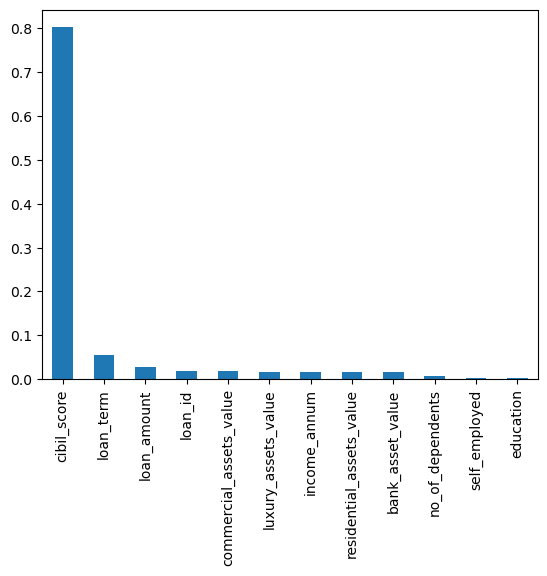

In [24]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

### Step 4: Answer the following questions.

**Question:** How well does the logistic regression model predict both the `1` (Approved loan) and `0` (Rejected loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

**Question:** What are the most significant factors influencing loan approval decisions?

**Answer:** WRITE YOUR ANSWER HERE!

**Question:** How well can machine learning predict loan approvals compared to traditional methods?

**Answer:** WRITE YOUR ANSWER HERE!

**Question:** Can the model provide explainable insights to support its predictions?

**Answer:** WRITE YOUR ANSWER HERE!

---